In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
df = pd.read_csv('marketing.csv',  parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

In [54]:
email = df[df['marketing_channel'] == 'Email']
allocation = email.groupby(['variant'])\
            ['user_id'].nunique()

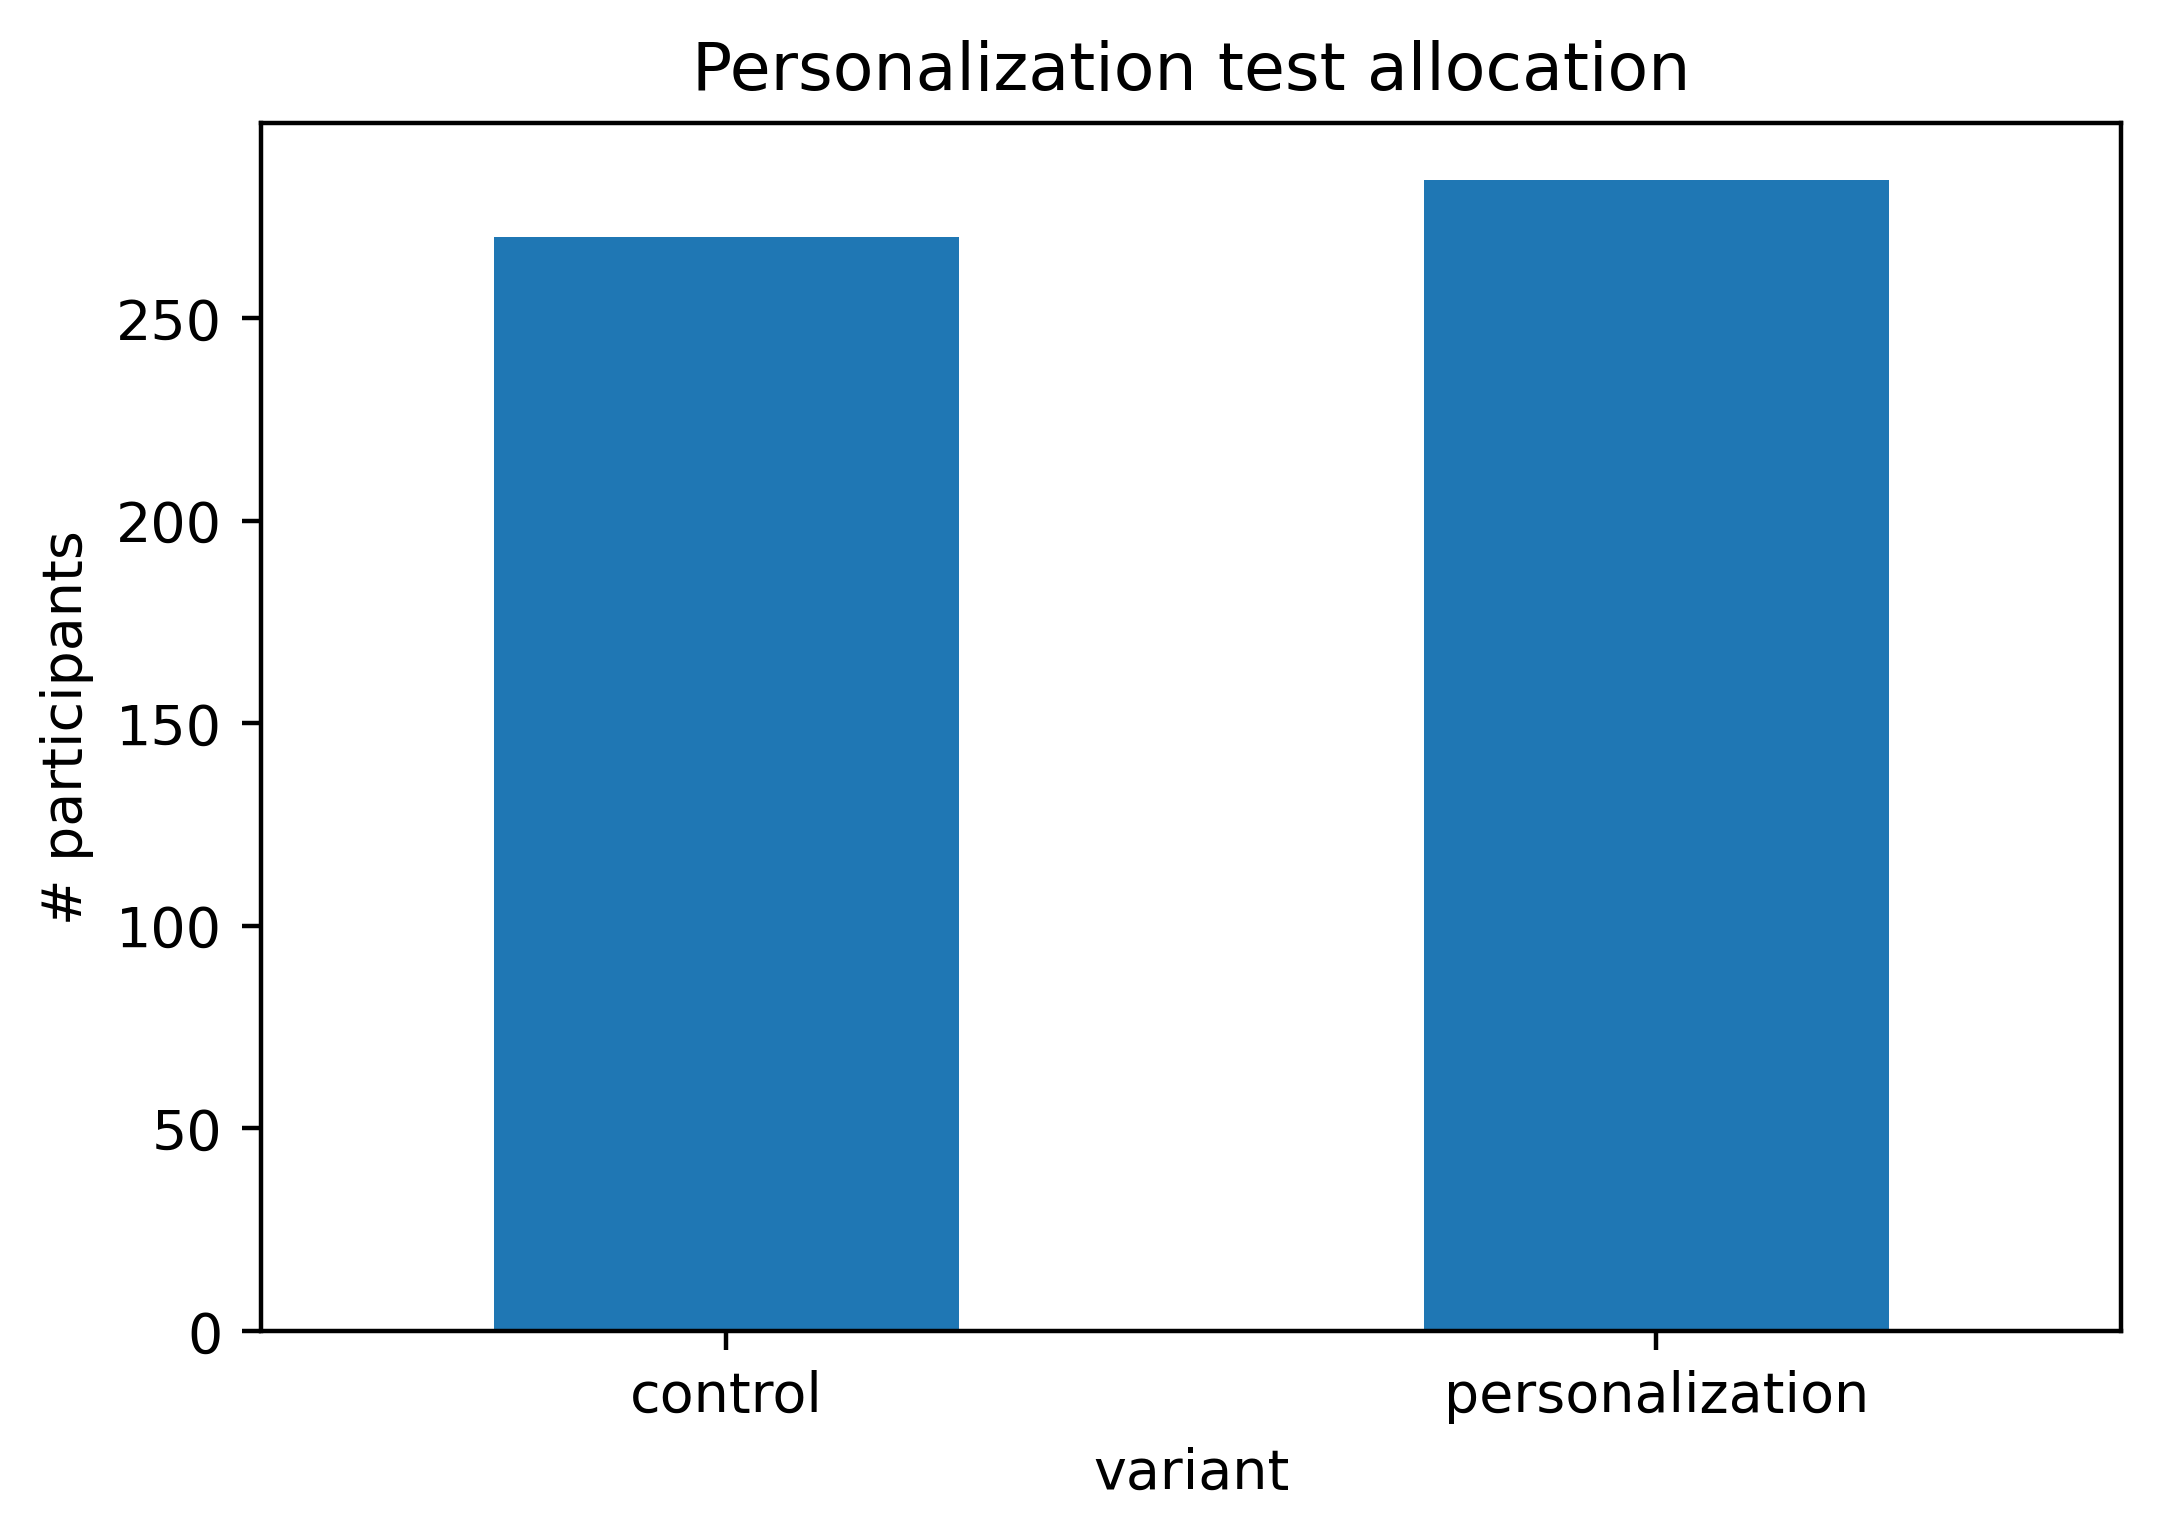

In [55]:
allocation.plot(kind='bar')
plt.title('Personalization test allocation')
plt.xticks(rotation=0)
plt.ylabel('# participants')
plt.show()

In [56]:
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
subscribers = pd.DataFrame(subscribers.unstack(level=1))
subscribers.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


In [57]:
subscribers['control'].value_counts()

False    194
True      76
Name: control, dtype: int64

In [58]:
control = subscribers['control'].dropna()
personalization = subscribers['personalization'].dropna()

In [59]:
print('Control conversion rate:', np.mean(control))
print('Personlization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personlization conversion rate: 0.3908450704225352


In [60]:
def lift(a,b):
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    lift = (b_mean-a_mean)/a_mean
    return str(round(lift*100, 2)) + '%'
print(lift(control, personalization))

38.85%


In [61]:
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print('pvalue: ' +str(round(t[1], 4)))

pvalue: 0.0065


In [68]:
def ab_segmentation(df, segment):
    for subsegment in np.unique(df[segment].values):
        print(subsegment)
      
        email = df[(df['marketing_channel'] == 'Email') & (df[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [69]:
ab_segmentation(df, 'language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [70]:
ab_segmentation(df, 'age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867335) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.017975686009788286) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 


